<a href="https://colab.research.google.com/github/tawekira/Multi-Modal-RAG-System/blob/main/RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import userdata

In [2]:
!apt-get install -y poppler-utils
!sudo apt install tesseract-ocr
!pip install pytesseract
!apt-get install libmagic-dev
!pip install python-magic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.11 [186 kB]
Fetched 186 kB in 1s (281 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 125080 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.11_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.11) ...
Setting up poppler-utils (22.02.0-2ubuntu0.11) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly insta

In [3]:
%pip install "unstructured[all-docs]"
!pip install Pillow
!pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.1/529.1 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 82.8 MB/s eta 0:00:00
   

In [4]:
!pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 25.5 MB/s eta 0:00:00


Partition PDF text and images

In [5]:
from google.colab import drive
drive.mount('/content/drive')
filepath = "/content/drive/MyDrive/DataAnalysis.pdf"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from unstructured.partition.pdf import partition_pdf
chunks = partition_pdf(
    filename = filepath,

    infer_table_structure=True,
    stategy="hi_res",

    extract_image_block_types=["Image"],
    extract_image_block_to_payload = True,

    chunking_strategy="by_title",
    max_characters=10000,
    combine_text_under_n_chars = 2000,
    new_after_n_chars = 6000,


)

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Separate extracted elements into text and images

In [7]:
texts = chunks
print(len(texts))

12


In [8]:
def get_images_base64(chunks):
  images_b64 = []
  for chunk in chunks:
    chunk_els = chunk.metadata.orig_elements
    for el in chunk_els:
      if "Image" in str(type(el)):
        images_b64.append(el.metadata.image_base64)
  return images_b64

images = get_images_base64(chunks)
print(len(images))

8


Check images

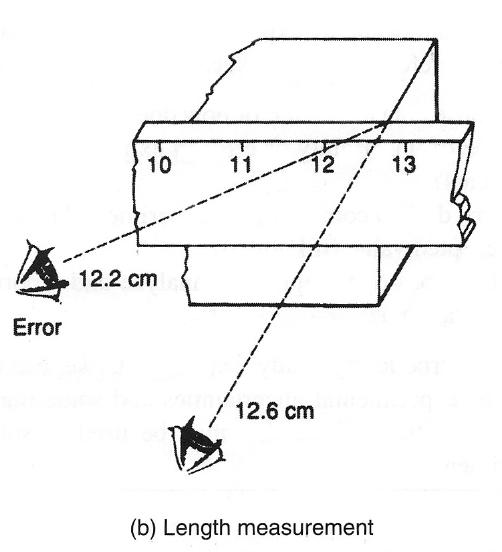

In [9]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
  image_data = base64.b64decode(base64_code)
  display(Image(data=image_data))

display_base64_image(images[1])

Summarise images

In [10]:
import google.generativeai as genai
import time

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

if GOOGLE_API_KEY:
    try:
        gemini_model = genai.GenerativeModel('gemini-flash-latest')
    except Exception as e:
        print(f"Error initializing Gemini model: {e}")
        gemini_model = None
else:
    gemini_model = None

In [11]:
if gemini_model and images:
    image_summaries = []
    prompt_template_gemini = """Describe the image in detail. For context,
                      the image is part of a physics textbook discussing
                      the measurement of physical quantities."""

    print("Starting Gemini image summarization...")
    for i, image_data in enumerate(images):
        try:
            response = gemini_model.generate_content([prompt_template_gemini, {"mime_type": "image/jpeg", "data": image_data}])
            summary = response.text
            image_summaries.append(summary)
            print(f"Successfully summarized image {i+1}/{len(images)}.")
            time.sleep(1)
        except Exception as e:
            print(f"Error summarizing image {i+1}/{len(images)}: {e}")
            image_summaries.append(f"Error summarizing image: {e}")

    print(f"\nGenerated summaries for {len(image_summaries)} images using Gemini.")
else:
    print("Gemini model not initialized or no images found to summarize.")

Starting Gemini image summarization...
Successfully summarized image 1/8.
Successfully summarized image 2/8.
Successfully summarized image 3/8.
Successfully summarized image 4/8.
Successfully summarized image 5/8.
Successfully summarized image 6/8.
Successfully summarized image 7/8.
Successfully summarized image 8/8.

Generated summaries for 8 images using Gemini.


In [12]:
print(image_summaries[0])

The image is a black-and-white schematic diagram illustrating the concept of **parallax error** during the measurement of temperature using a thermometer. The primary purpose of the diagram is to show how an observer's viewing angle affects the accuracy of a reading.

### Instrument and True Reading

On the right side of the diagram, a section of a graduated measuring instrument, labeled as part of a **temperature measurement**, is displayed. The scale is marked in degrees Celsius (°C). Visible major markings include 20, 21, and 22. The interval between these major markings (1°C) is subdivided into ten smaller tick marks, indicating that the smallest division is 0.1°C.

A shaded column, representing the measuring fluid (like mercury or alcohol), rises just above the 21°C mark. The true level of the fluid column aligns exactly with the third small tick mark above 21.

### The Observation Angles and Parallax Error

On the left side of the diagram, three distinct representations of an obs

Embedding

In [13]:
from google import genai
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

client = genai.Client(api_key=GOOGLE_API_KEY)

def embed(content):
  result = client.models.embed_content(
      model="gemini-embedding-001",
      contents = content
  )
  return result.embeddings

In [14]:
import pymongo
text_embeddings = []
for text_element in texts:
  text_content = text_element.text
  embedding_object_list = embed(text_content)
  embedding_object = embedding_object_list[0]
  text_embeddings.append(embedding_object)

text_docs = []
for i, (embedding_object, text_element) in enumerate(zip(text_embeddings, texts)):
  doc = {
      "type": "text",
      "text": text_element.text,
      "embedding": embedding_object.values,
  }
  text_docs.append(doc)

print(text_docs[0])

{'type': 'text', 'text': 'Measurements and Data Analysis\n\n1\n\nIntroduction\n\nThe central point in experimental physical science is the measurement of physical quantities. Experience has shown that all measurements, no matter how carefully made, have some degree of uncertainty that may come from a variety of sources. The study and evaluation of uncertainty in measurement is often called uncertainty analysis or error analysis.\n\nThe complete statement of a measured value should include an estimate of the level of con- ﬁdence associated with the value. Properly reporting an experimental result along with its uncertainty allows other people to make judgements about the quality of the experiment and it facilitates meaningful comparisons with other similar values or a theoretical prediction. With- out an estimated uncertainty, it would be impossible to answer the basic scientiﬁc questions such as: “Does my result agree with theoretical prediction or results from other experiments?” This

In [15]:
mongo_client = pymongo.MongoClient(userdata.get('MONGO_URI'))
db = mongo_client["RAG"]
db["data"].insert_many(text_docs)


InsertManyResult([ObjectId('6907296cb68c240059f027ba'), ObjectId('6907296cb68c240059f027bb'), ObjectId('6907296cb68c240059f027bc'), ObjectId('6907296cb68c240059f027bd'), ObjectId('6907296cb68c240059f027be'), ObjectId('6907296cb68c240059f027bf'), ObjectId('6907296cb68c240059f027c0'), ObjectId('6907296cb68c240059f027c1'), ObjectId('6907296cb68c240059f027c2'), ObjectId('6907296cb68c240059f027c3'), ObjectId('6907296cb68c240059f027c4'), ObjectId('6907296cb68c240059f027c5')], acknowledged=True)

In [16]:
image_embeddings = []
for summary in image_summaries:
  text_content = summary
  embedding_object_list = embed(text_content)
  embedding_object = embedding_object_list[0]
  image_embeddings.append(embedding_object)

image_docs = []
for i, (embedding_object, summary, b64) in enumerate(zip(image_embeddings, image_summaries, images)):
  doc = {
      "type": "image",
      "image": b64,
      "text": summary,
      "embedding": embedding_object.values,
  }
  image_docs.append(doc)

print(image_docs[0])

{'type': 'image', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAIoAfcDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD338M0nfvThS0ANxx6Udeop2BRgelACUmeadRQA3tQPelxjpxRigBOpop3FISACScAdTQAmajF1A101qJ4zcKgkaIONwUkgEjrgkEZ9jXn/iz4waJoExs9P26rfKfmjhkwi9eN+CCc9h/h

In [17]:
mongo_client = pymongo.MongoClient(userdata.get('MONGO_URI'))
db = mongo_client["RAG"]
db["data"].insert_many(image_docs)

InsertManyResult([ObjectId('6907297fb68c240059f027c7'), ObjectId('6907297fb68c240059f027c8'), ObjectId('6907297fb68c240059f027c9'), ObjectId('6907297fb68c240059f027ca'), ObjectId('6907297fb68c240059f027cb'), ObjectId('6907297fb68c240059f027cc'), ObjectId('6907297fb68c240059f027cd'), ObjectId('6907297fb68c240059f027ce')], acknowledged=True)

Querying

In [18]:
query = "Tell me more about systematic errors"
embedding_object = embed(query)[0]

In [19]:
results = db.data.aggregate([
  {
    "$vectorSearch": {
      "index": "vectorsearch",
      "path": "embedding",
      "queryVector": embedding_object.values,
      "numCandidates": 50,
      "limit": 2
    }
  },
  {

    "$addFields": {
      "score": { "$meta": "vectorSearchScore" }
    }
  },
  {

    "$match": {
      "score": { "$gte": 0.7 }
    }
  },

])
retrieved_texts = []
retrieved_images = []
retrieved_ids = []
for document in results:
  retrieved_texts.append(document["text"])
  retrieved_ids.append(str(document["_id"]))
  if document["type"] == "image":
    retrieved_images.append(document["image"])
print(len(retrieved_texts))
print(len(retrieved_images))

2
0


Answering

In [20]:
text_delimiter = "\n\n--- DOCUMENT ENDS ---\n\n"
context_string = text_delimiter.join(retrieved_texts)

In [21]:
if gemini_model:
    prompt_template_gemini = f"""
    You are an accurate technical assistant. Answer the question only based on
    the context provided below. If the answer is not in the context, only state
    that the information is unavailable, nothing more.

    --- START CONTEXT ---
    {context_string}
    --- END CONTEXT ---

    Question: {query}
    """

    response = gemini_model.generate_content([prompt_template_gemini])
    for image in retrieved_images:
      display_base64_image(image)
    print("\n")
    print(response.text)
    print("\n")
    print("Document ids:")
    print(",".join(retrieved_ids))





Systematic uncertainties increase or decrease all measurements of a quantity in the same sense, meaning all measurements will tend to be either too large or too small.

They are usually associated with particular measurement instruments or techniques, such as an improperly calibrated instrument or bias on the part of the experimenter. Conditions from which systematic uncertainties can result include:

1.  An improperly “zeroed” instrument (e.g., an ammeter giving a non-zero reading when there is no current).
2.  A faulty instrument (e.g., a thermometer that reads 101◦C when immersed in boiling water at standard atmospheric pressure).
3.  Personal error, such as using a wrong constant in calculation or always taking a high or low reading of a scale division, or parallax when reading a scale.

Systematic uncertainties are hard to deal with as it depends on the skills of the experimenter to recognize the sources of such uncertainties and to prevent them. However, once determined, such u